In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Hiển thị cách đánh index của dữ liệu
df.index

RangeIndex(start=0, stop=303, step=1)

In [4]:
# Danh sách các cột input
columns_ead = df.columns[:-1]

columns_ead

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

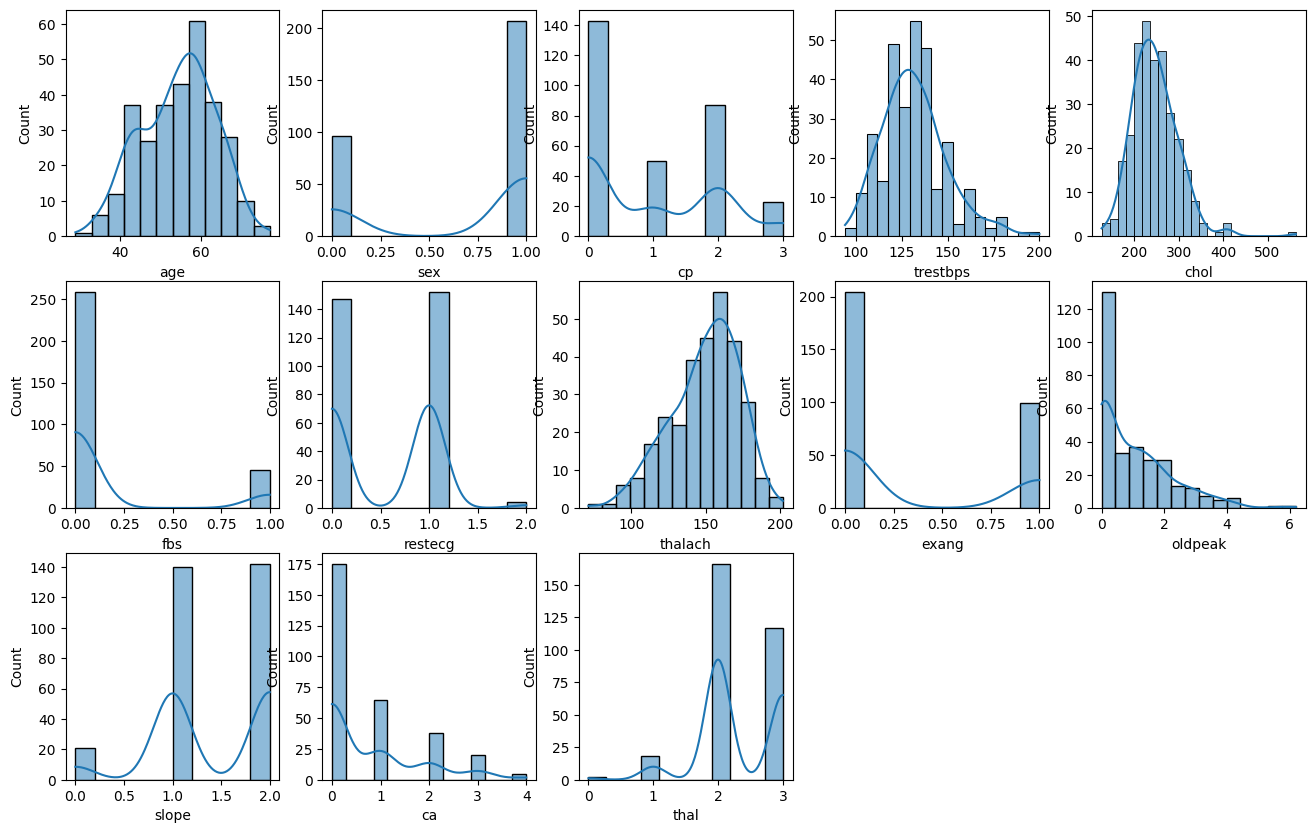

In [5]:
# Phân tích phân phối các biến số input
fig = plt.figure(figsize=(16,10))

for i in range(len(columns_ead)):
    colname = columns_ead[i]
    sub = fig.add_subplot(3,5,i+1)
    sns.histplot(data=df, x=colname, kde=True)

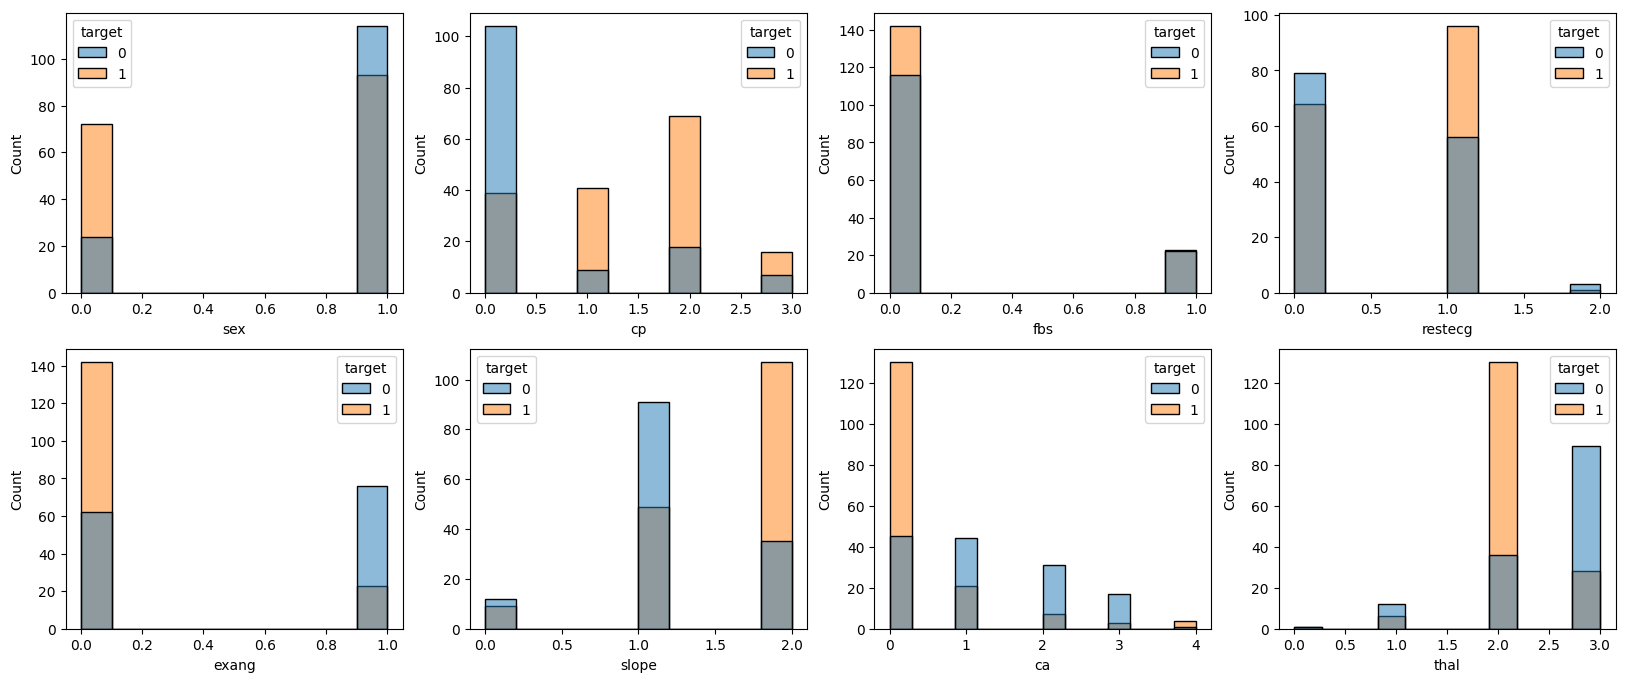

In [6]:
# Đếm xem số lượng các biến input (nhóm định tính) 
# theo biến mục tiêu

categoris_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig = plt.figure(figsize=(20,8))

for i in range(len(categoris_list)):
    colname = categoris_list[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.histplot(data=df, x=colname, hue='target')

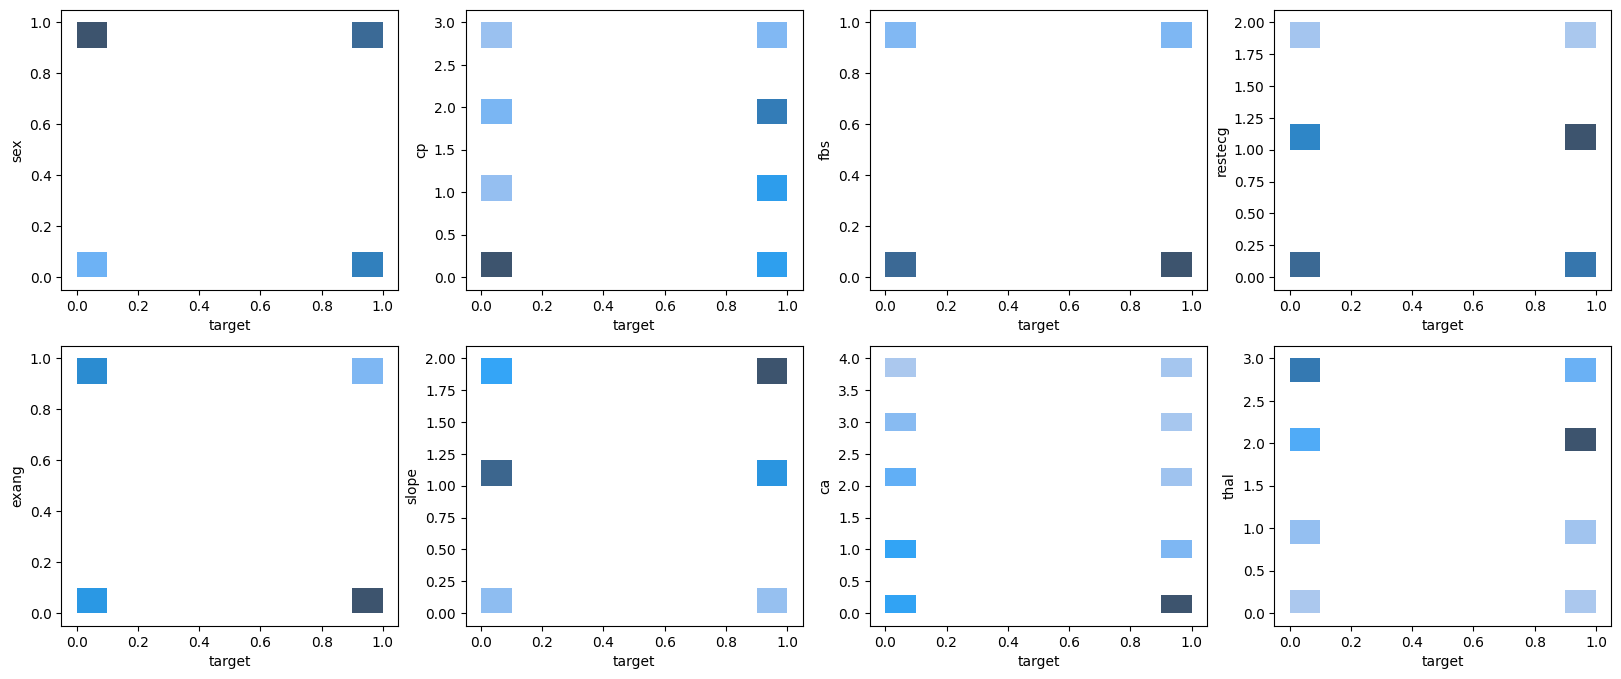

In [7]:
# Phân tích biểu đồ Box-plot các biến input (nhóm định lượng) 
# theo biến mục tiêu 
numeric_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig = plt.figure(figsize=(20,8))

for i in range(len(categoris_list)):
    colname = categoris_list[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.histplot(data=df, y=colname, x='target')

<h3>Xây dựng mô hình</h3>

In [8]:
# Chuẩn bị dữ liệu
X = df.iloc[:,:-1].values
y = df[['target']].values
X = X.astype(float)
y = y.astype(float)

In [9]:
# Phân chia tập dữ liệu thành hai phần train và 
# test tỉ lệ 80:20 và hệ số random là 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X,y,df.index,test_size=0.2, random_state=42)

In [10]:
# Hiển thị danh sách index của các sample trong tập X_train, X_test 
print("Các index trong tập huấn luyện:\n", indices_train)
print("\nCác index trong tập kiểm thử:\n", indices_test)

Các index trong tập huấn luyện:
 Index([132, 202, 196,  75, 176,  59,  93,   6, 177,  30,
       ...
        87, 214, 121, 302,  20, 188,  71, 106, 270, 102],
      dtype='int64', length=242)

Các index trong tập kiểm thử:
 Index([179, 228, 111, 246,  60,   9, 119, 223, 268,  33,   5, 101,  45, 175,
       118,  46, 125, 192, 285, 279, 152, 269, 272,  25, 146, 283, 254,  73,
       231, 109, 139, 284, 198,  42,  17, 168,  76,  90,  24,  57,  92,  77,
       137, 116,   7, 251, 281,  78, 292, 232, 219, 255,  63,  82, 236, 204,
       249, 104, 300, 193, 184],
      dtype='int64')


In [11]:
# Huấn luyện mô hình
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8, algorithm='ball_tree')
knn.fit(X_train, y_train)

d:\IUH\Nam_2023-2024\HKI\LTPTDL1\my_env\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8)

In [12]:
# Đánh giá mô hình trên tập test bằng độ đo accuracy
knn.score(X_test, y_test)

# Độ chính xác ~ 0.7

0.6885245901639344

d:\IUH\Nam_2023-2024\HKI\LTPTDL1\my_env\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\IUH\Nam_2023-2024\HKI\LTPTDL1\my_env\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\IUH\Nam_2023-2024\HKI\LTPTDL1\my_env\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\IUH\Nam_2023-2024\HKI\LTPTDL1\my_env\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1

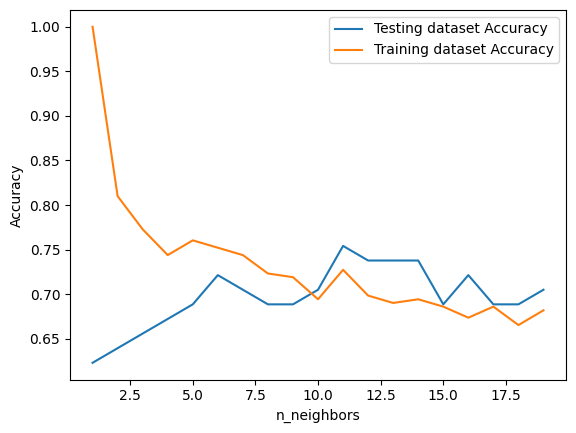

In [13]:
# Sử dụng độ đo đánh giá accuracy trên tập train và test để so sánh và chọn lựa K bao 
# nhiêu là tốt nhất cho mô hình K-NN. Sinh viên nhìn biểu đồ để trả lời
import numpy as np
neighbors = np.arange(1,20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.plot(neighbors, test_accuracy, label = "Testing dataset Accuracy")
plt.plot(neighbors, train_accuracy, label = "Training dataset Accuracy")

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()
    

In [14]:
# Xây dựng lại mô hình với K là tốt nhất dựa trên câu 4f. 
# Sau đó, sử dụng kết quả đó để giải 
# quyết từ câu 6 trở đi.
knn = KNeighborsClassifier(n_neighbors=11, algorithm='ball_tree')
knn.fit(X_train, y_train)

d:\IUH\Nam_2023-2024\HKI\LTPTDL1\my_env\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=11)

In [15]:
knn.score(X_test, y_test)

0.7540983606557377

d:\IUH\Nam_2023-2024\HKI\LTPTDL1\my_env\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\IUH\Nam_2023-2024\HKI\LTPTDL1\my_env\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\IUH\Nam_2023-2024\HKI\LTPTDL1\my_env\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\IUH\Nam_2023-2024\HKI\LTPTDL1\my_env\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1

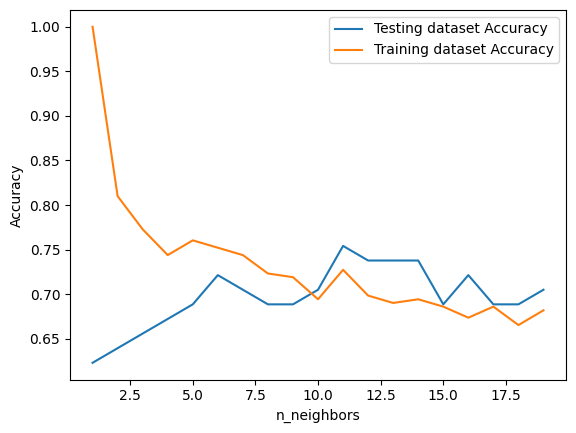

In [16]:
import numpy as np
neighbors = np.arange(1,20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.plot(neighbors, test_accuracy, label = "Testing dataset Accuracy")
plt.plot(neighbors, train_accuracy, label = "Training dataset Accuracy")

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [17]:
# In ra danh sách khoảng cách và các hàng xóm từ các 
# mẫu dữ liệu trong tập test từ mô hình ở câu 5
distances, indices = knn.kneighbors(X_test)

for i in range(len(X_test)):
    print("Mẫu thứ", i+1)
    print("Khoảng cách:", distances[i])
    print("Các hàng xóm:", indices[i])
    print()

Mẫu thứ 1
Khoảng cách: [ 6.63626401 17.93906352 18.22882333 23.23122898 24.27673784 27.23894271
 28.29416901 28.8159678  31.74649587 32.21241996 32.83230117 33.29804799
 33.9316961  34.9450998  35.84633873 36.37526632 38.00052631 38.12033578
 39.05176052]
Các hàng xóm: [  1  79 161 222 211  25 217 166 103 111  88 192 137 138  86  69  70  67
 187]

Mẫu thứ 2
Khoảng cách: [20.96759404 21.51650529 26.15415837 27.35616932 27.89336839 28.93095228
 31.43580761 32.57299495 34.21461676 35.98555266 36.39725264 36.40659281
 36.57266739 38.45828909 39.15405471 40.41088962 40.73929307 41.24366618
 42.49752934]
Các hàng xóm: [179 101  89  70 167  92   7 149 114 221 172 118  24   6 170 132 163 110
 204]

Mẫu thứ 3
Khoảng cách: [46.55276576 46.92589903 53.2169146  54.00962877 54.00962877 54.46503466
 61.48788499 61.61980201 61.91413409 62.66450351 62.98761783 63.04791828
 63.82037292 64.83856877 66.9623775  68.26448564 68.52036194 68.7054583
 69.41728891]
Các hàng xóm: [195 148 147  19  34 106 176 21

In [18]:
# Cho biết sample input đầu tiên trong tập test sẽ lần lượt gần K 
# (hàng xóm) dòng nào trong 
# tập train tính theo index và khoảng cách tương đương theo độ đo 
# Euclidean là bao nhiêu?

# Lấy thông tin của mẫu đầu tiên
first_sample_index = 0  # Chỉ số của mẫu đầu tiên trong X_test

first_sample_distances = distances[first_sample_index]
first_sample_indices = indices[first_sample_index]

print("Mẫu thứ", first_sample_index + 1)
print("Khoảng cách:", first_sample_distances)
print("Các hàng xóm:", first_sample_indices)

Mẫu thứ 1
Khoảng cách: [ 6.63626401 17.93906352 18.22882333 23.23122898 24.27673784 27.23894271
 28.29416901 28.8159678  31.74649587 32.21241996 32.83230117 33.29804799
 33.9316961  34.9450998  35.84633873 36.37526632 38.00052631 38.12033578
 39.05176052]
Các hàng xóm: [  1  79 161 222 211  25 217 166 103 111  88 192 137 138  86  69  70  67
 187]


In [19]:
# Cho biết với một sample input tương ứng ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
# 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] = [47,0,0,150,250,0,1,140,1,0.5,1,0,2] thì sẽ 
# gần K hàng xóm nào trong tập huấn luyện, với tương ứng lần lượt khoảng cách là bao nhiêu 
# và cho biết giá trị Age của hàng xóm gần nhất.

# Mẫu dữ liệu cần tìm hàng xóm gần nhất
new_sample = np.array([47, 0, 0, 150, 250, 0, 1, 140, 1, 0.5, 1, 0, 2]).reshape(1, -1)

# Chọn số lượng hàng xóm gần nhất (K)
k = 5

# Tạo mô hình KNN
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Tìm K hàng xóm gần nhất và khoảng cách
distances, indices = knn.kneighbors(new_sample)

# In kết quả
print("K hàng xóm gần nhất:")
for i in range(k):
    print(f"Hàng xóm {i+1}: {X_train[indices[0][i]]}")
    print(f"Khoảng cách: {distances[0][i]}")

# Giá trị Age của hàng xóm gần nhất
print(f"Giá trị Age của hàng xóm gần nhất: {X_train[indices[0][0]][0]}")

K hàng xóm gần nhất:
Hàng xóm 1: [ 61.   1.   2. 150. 243.   1.   1. 137.   1.   1.   1.   0.   2.]
Khoảng cách: 16.132265804901678
Hàng xóm 2: [ 46.    1.    2.  150.  231.    0.    1.  147.    0.    3.6   1.    0.
   2. ]
Khoảng cách: 20.65453945262397
Hàng xóm 3: [ 47.   1.   2. 138. 257.   0.   0. 156.   0.   0.   2.   0.   2.]
Khoảng cách: 21.383404780343096
Hàng xóm 4: [ 62.    0.    0.  150.  244.    0.    1.  154.    1.    1.4   1.    0.
   2. ]
Khoảng cách: 21.396495040076072
Hàng xóm 5: [4.50e+01 0.00e+00 0.00e+00 1.38e+02 2.36e+02 0.00e+00 0.00e+00 1.52e+02
 1.00e+00 2.00e-01 1.00e+00 0.00e+00 2.00e+00]
Khoảng cách: 22.1153792642134
Giá trị Age của hàng xóm gần nhất: 61.0


d:\IUH\Nam_2023-2024\HKI\LTPTDL1\my_env\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [20]:
# Xem danh sách các giá trị của lớp đánh nhãn của biến output (target) nhằm xác định bệnh 
# nhân có bệnh hay không

# Kiểm tra các giá trị duy nhất và số lần xuất hiện
unique_values_target = df['target'].unique()
value_counts_target = df['target'].value_counts()

print("Các giá trị duy nhất của biến mục tiêu:")
print(unique_values_target)

print("Số lần xuất hiện của mỗi giá trị:")
print(value_counts_target)

Các giá trị duy nhất của biến mục tiêu:
[1 0]
Số lần xuất hiện của mỗi giá trị:
target
1    165
0    138
Name: count, dtype: int64


In [21]:
# Cho biết mẫu input thứ hai trong tập test  khi qua mô hình dự báo sẽ cho xác xuất dự báo 
# nhãn nào cao hơn và giá trị là bao nhiêu, còn nhãn thấp là nhãn nào có xác suất bao nhiêu

# Dự đoán cho mẫu thứ 2
y_pred_proba = knn.predict_proba(X_test[1].reshape(1, -1))

# Lấy các nhãn và xác suất tương ứng
classes = knn.classes_
probabilities = y_pred_proba[0]

# Tìm nhãn có xác suất cao nhất và thấp nhất
max_prob_class = classes[np.argmax(probabilities)]
min_prob_class = classes[np.argmin(probabilities)]
max_prob = np.max(probabilities)
min_prob = np.min(probabilities)

print("Nhãn có xác suất cao nhất:", max_prob_class, "với xác suất:", max_prob)
print("Nhãn có xác suất thấp nhất:", min_prob_class, "với xác suất:", min_prob)


Nhãn có xác suất cao nhất: 1.0 với xác suất: 0.8
Nhãn có xác suất thấp nhất: 0.0 với xác suất: 0.2


In [22]:
# Liệt kê danh sách các nhãn dự báo thông qua mô hình của các mẫu dữ liệu input trong tập 
# test. Hãy cho biết kết quả dự báo của mẫu input thứ 5 trong tập test sẽ được dự báo là bao 
# nhiêu?

y_test_predicted = knn.predict(X_test)

y_test_predicted

array([0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0.])

In [23]:
print("Nhãn dự đoán của mẫu thứ 5:", y_test_predicted[4])

Nhãn dự đoán của mẫu thứ 5: 0.0


In [24]:
# Hãy cho biết nếu điều chỉnh ngưỡng xác suất (threshold) đưa ra quyết định là 0.65 thì kết 
# quả dự báo của mẫu input số hai và mẫu số năm và mẫu số sáu là bao nhiêu 

# Ngưỡng mới
threshold = 0.65

# Lấy xác suất dự đoán của mẫu thứ 2, 5, 6 cho lớp 1 (giả sử lớp 1 là lớp dương)
prob_sample_2 = y_test_predicted[1]
prob_sample_5 = y_test_predicted[4]
prob_sample_6 = y_test_predicted[5]

print(prob_sample_2)
print(prob_sample_5)
print(prob_sample_6)

1.0
0.0
1.0


In [25]:
#  Hãy đánh giá mô hình trên tập test qua Confussion – Matrix
from sklearn.metrics import confusion_matrix
cfmx = confusion_matrix(y_test, y_test_predicted)

cfmx

array([[18, 11],
       [ 8, 24]])

In [26]:
# Dựa vào confusion matrix, hãy cho biết giá trị quan trọng nhất trong bài toán dự báo này.
tn, fp, fn, tp = confusion_matrix(y_test, y_test_predicted).ravel()

print(f'{tn}, {fp}, {fn}, {tp},')

18, 11, 8, 24,


In [27]:
# Hãy đánh giá mô hình thông qua các giá trị Precision, Recall và F1 tổng quát. Trong bài
# toán dự báo này thì đại lượng nào quan trọng.
from sklearn.metrics import precision_score, recall_score, f1_score

# Tính Precision
precision = precision_score(y_test, y_test_predicted)
print(f"Precision: {precision}")

# Tính Recall
recall = recall_score(y_test, y_test_predicted)
print(f"Recall: {recall}")

# Tính F1-Score
f1 = f1_score(y_test, y_test_predicted)
print(f"F1-Score: {f1}")

# Đại lượng Recall quan trọng

Precision: 0.6857142857142857
Recall: 0.75
F1-Score: 0.7164179104477612


In [28]:
# Hãy in ra bảng báo cáo các đại lượng đánh giá theo từng nhóm giá trị nhãn đầu ra
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

         0.0       0.69      0.62      0.65        29
         1.0       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



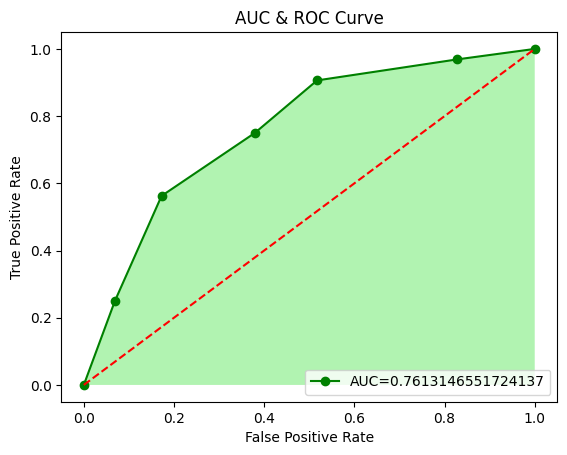

In [29]:
from sklearn import metrics

y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,'go-',label="AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.title("AUC & ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.show()

Accuracy: 0.6885245901639344
Confusion matrix:
 [[18 11]
 [ 8 24]]
TN: 18 FP: 11 FN: 8 TP: 24
              precision    recall  f1-score   support

         0.0       0.69      0.62      0.65        29
         1.0       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



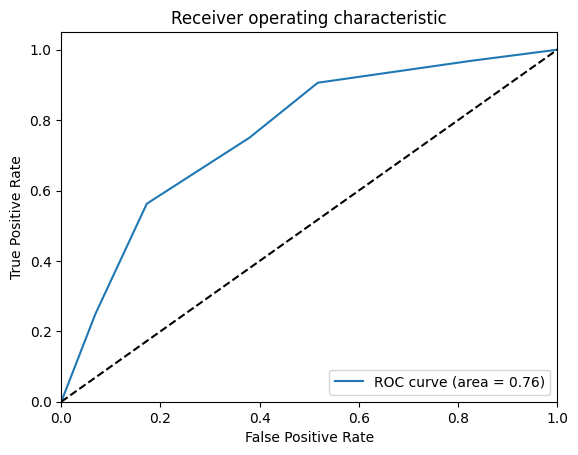

In [32]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Tính accuracy
accuracy = accuracy_score(y_test, y_test_predicted)
print("Accuracy:", accuracy)

# Tính confusion matrix
cm = confusion_matrix(y_test, y_test_predicted)
print("Confusion matrix:\n", cm)

# Tính các chỉ số khác
tn, fp, fn, tp = cm.ravel()
print("TN:", tn, "FP:", fp, "FN:", fn, "TP:", tp)
print(classification_report(y_test, y_test_predicted))

# Vẽ đồ thị ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier
# Chia dữ liệu thành tập huấn luyện và kiểm thử
X = df.drop('target', axis=1)  # Các đặc trưng
y = df['target']  # Nhãn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình
model = RandomForestClassifier()

model.fit(X_train, y_train)

# Hàm dự đoán
def predict_heart_disease(features, threshold=0.5):
    # Chuyển đổi dữ liệu đầu vào thành DataFrame
    features = pd.DataFrame([features])
    
    # Dự đoán xác suất
    probabilities = model.predict_proba(features)[:, 1]
    
    # Dự đoán nhãn dựa trên ngưỡng
    prediction = 1 if probabilities >= threshold else 0
    
    return prediction

# Nhập liệu từ người dùng
while True:
    print("Nhập các đặc trưng (dạng số), cách nhau bằng dấu phẩy:")
    features_str = input()
    try:
        features = [float(x) for x in features_str.split(',')]
        threshold = float(input("Nhập ngưỡng xác suất (mặc định 0.5): ") or 0.5)
        
        # Dự đoán
        result = predict_heart_disease(features, threshold)
        if result == 1:
            print("Kết quả dự đoán: Có khả năng mắc bệnh tim")
        else:
            print("Kết quả dự đoán: Không có khả năng mắc bệnh tim")
        
        break
    except ValueError:
        print("Vui lòng nhập các số cách nhau bởi dấu phẩy.")

Nhập các đặc trưng (dạng số), cách nhau bằng dấu phẩy:
Vui lòng nhập các số cách nhau bởi dấu phẩy.
Nhập các đặc trưng (dạng số), cách nhau bằng dấu phẩy:
Vui lòng nhập các số cách nhau bởi dấu phẩy.
Nhập các đặc trưng (dạng số), cách nhau bằng dấu phẩy:
Vui lòng nhập các số cách nhau bởi dấu phẩy.
Nhập các đặc trưng (dạng số), cách nhau bằng dấu phẩy:
Vui lòng nhập các số cách nhau bởi dấu phẩy.
Nhập các đặc trưng (dạng số), cách nhau bằng dấu phẩy:
Vui lòng nhập các số cách nhau bởi dấu phẩy.
Nhập các đặc trưng (dạng số), cách nhau bằng dấu phẩy:
Vui lòng nhập các số cách nhau bởi dấu phẩy.
Nhập các đặc trưng (dạng số), cách nhau bằng dấu phẩy:
Vui lòng nhập các số cách nhau bởi dấu phẩy.
Nhập các đặc trưng (dạng số), cách nhau bằng dấu phẩy:
Vui lòng nhập các số cách nhau bởi dấu phẩy.
Nhập các đặc trưng (dạng số), cách nhau bằng dấu phẩy:
Vui lòng nhập các số cách nhau bởi dấu phẩy.
Nhập các đặc trưng (dạng số), cách nhau bằng dấu phẩy:


KeyboardInterrupt: Interrupted by user